<a href="https://colab.research.google.com/github/ankitb808/ids-first-repo/blob/main/EASTWESTAIRLINES_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv('/content/EastWestAirlines.csv')

In [ ]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
# Drop the 'ID' column before standardizing
df_cleaned = df.drop(columns=['ID'])

In [ ]:
# Initialize the standard scaler
scaler = StandardScaler()

In [ ]:
# Standardize the features
df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)


In [ ]:
df_standardized.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [ ]:
# Elbow method to determine the optimal number of clusters
wcss = []
K_range = range(1, 11)

In [ ]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

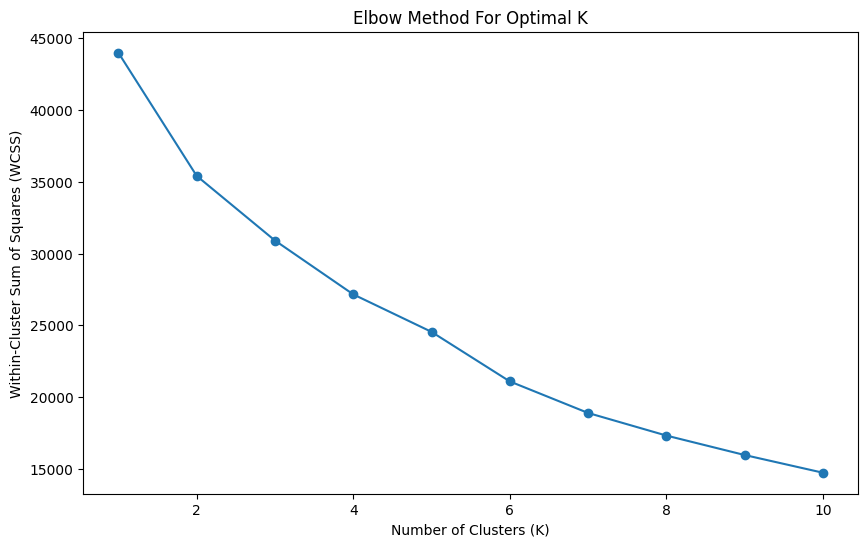

In [ ]:
# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
# Assume identifying the optimal K from the elbow plot, for example, let's use K=5
optimal_k = 5

In [ ]:
# Initializing the K-Means model with the selected parameters
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

In [ ]:
# Applying the model on the standardized data
kmeans_model.fit(df_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [ ]:
# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans_model.labels_

In [ ]:
# Display the first few rows of the dataframe with the cluster labels
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [ ]:
# Examining cluster labels
cluster_summary = df.groupby('Cluster').mean()

In [ ]:
cluster_summary

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Cluster,,,,,,,,,,,,
0,2233.347946,43837.679305,43.855450,1.226698,1.019352,1.000395,4753.095972,6.969194,200.140600,0.624408,3711.462875,0.203002
1,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
2,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,1602.540997,117361.299839,56.463826,3.721061,1.002412,1.001608,39502.667203,18.836817,346.309486,1.032154,4882.864148,0.648714
4,1757.802721,190251.952381,458.734694,2.224490,1.040816,1.000000,32907.979592,28.231293,5685.823129,16.523810,4673.081633,0.802721


In [ ]:
# Visualizing clusters using PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_standardized)

In [ ]:
# Create a DataFrame with the PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

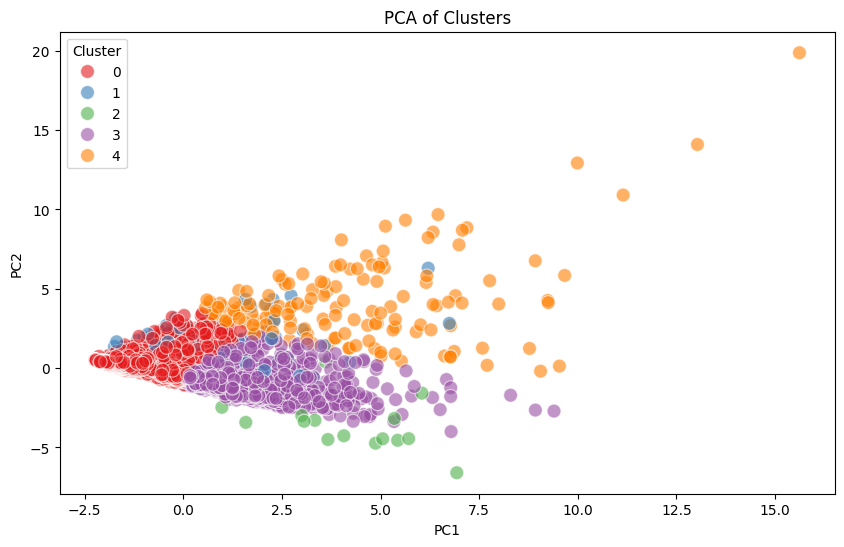

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, alpha=0.6)
plt.title('PCA of Clusters')
plt.show()

In [ ]:
# Calculate inertia
inertia = kmeans_model.inertia_

In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(df_standardized, kmeans_model.labels_)


In [ ]:
inertia, silhouette_avg

(24541.471294111274, 0.3188772727741292)

In [ ]:
# Analyzing cluster patterns by checking the mean values of each feature per cluster
cluster_summary = df.groupby('Cluster').mean()

In [ ]:
cluster_summary

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Cluster,,,,,,,,,,,,
0,2233.347946,43837.679305,43.855450,1.226698,1.019352,1.000395,4753.095972,6.969194,200.140600,0.624408,3711.462875,0.203002
1,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
2,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,1602.540997,117361.299839,56.463826,3.721061,1.002412,1.001608,39502.667203,18.836817,346.309486,1.032154,4882.864148,0.648714
4,1757.802721,190251.952381,458.734694,2.224490,1.040816,1.000000,32907.979592,28.231293,5685.823129,16.523810,4673.081633,0.802721


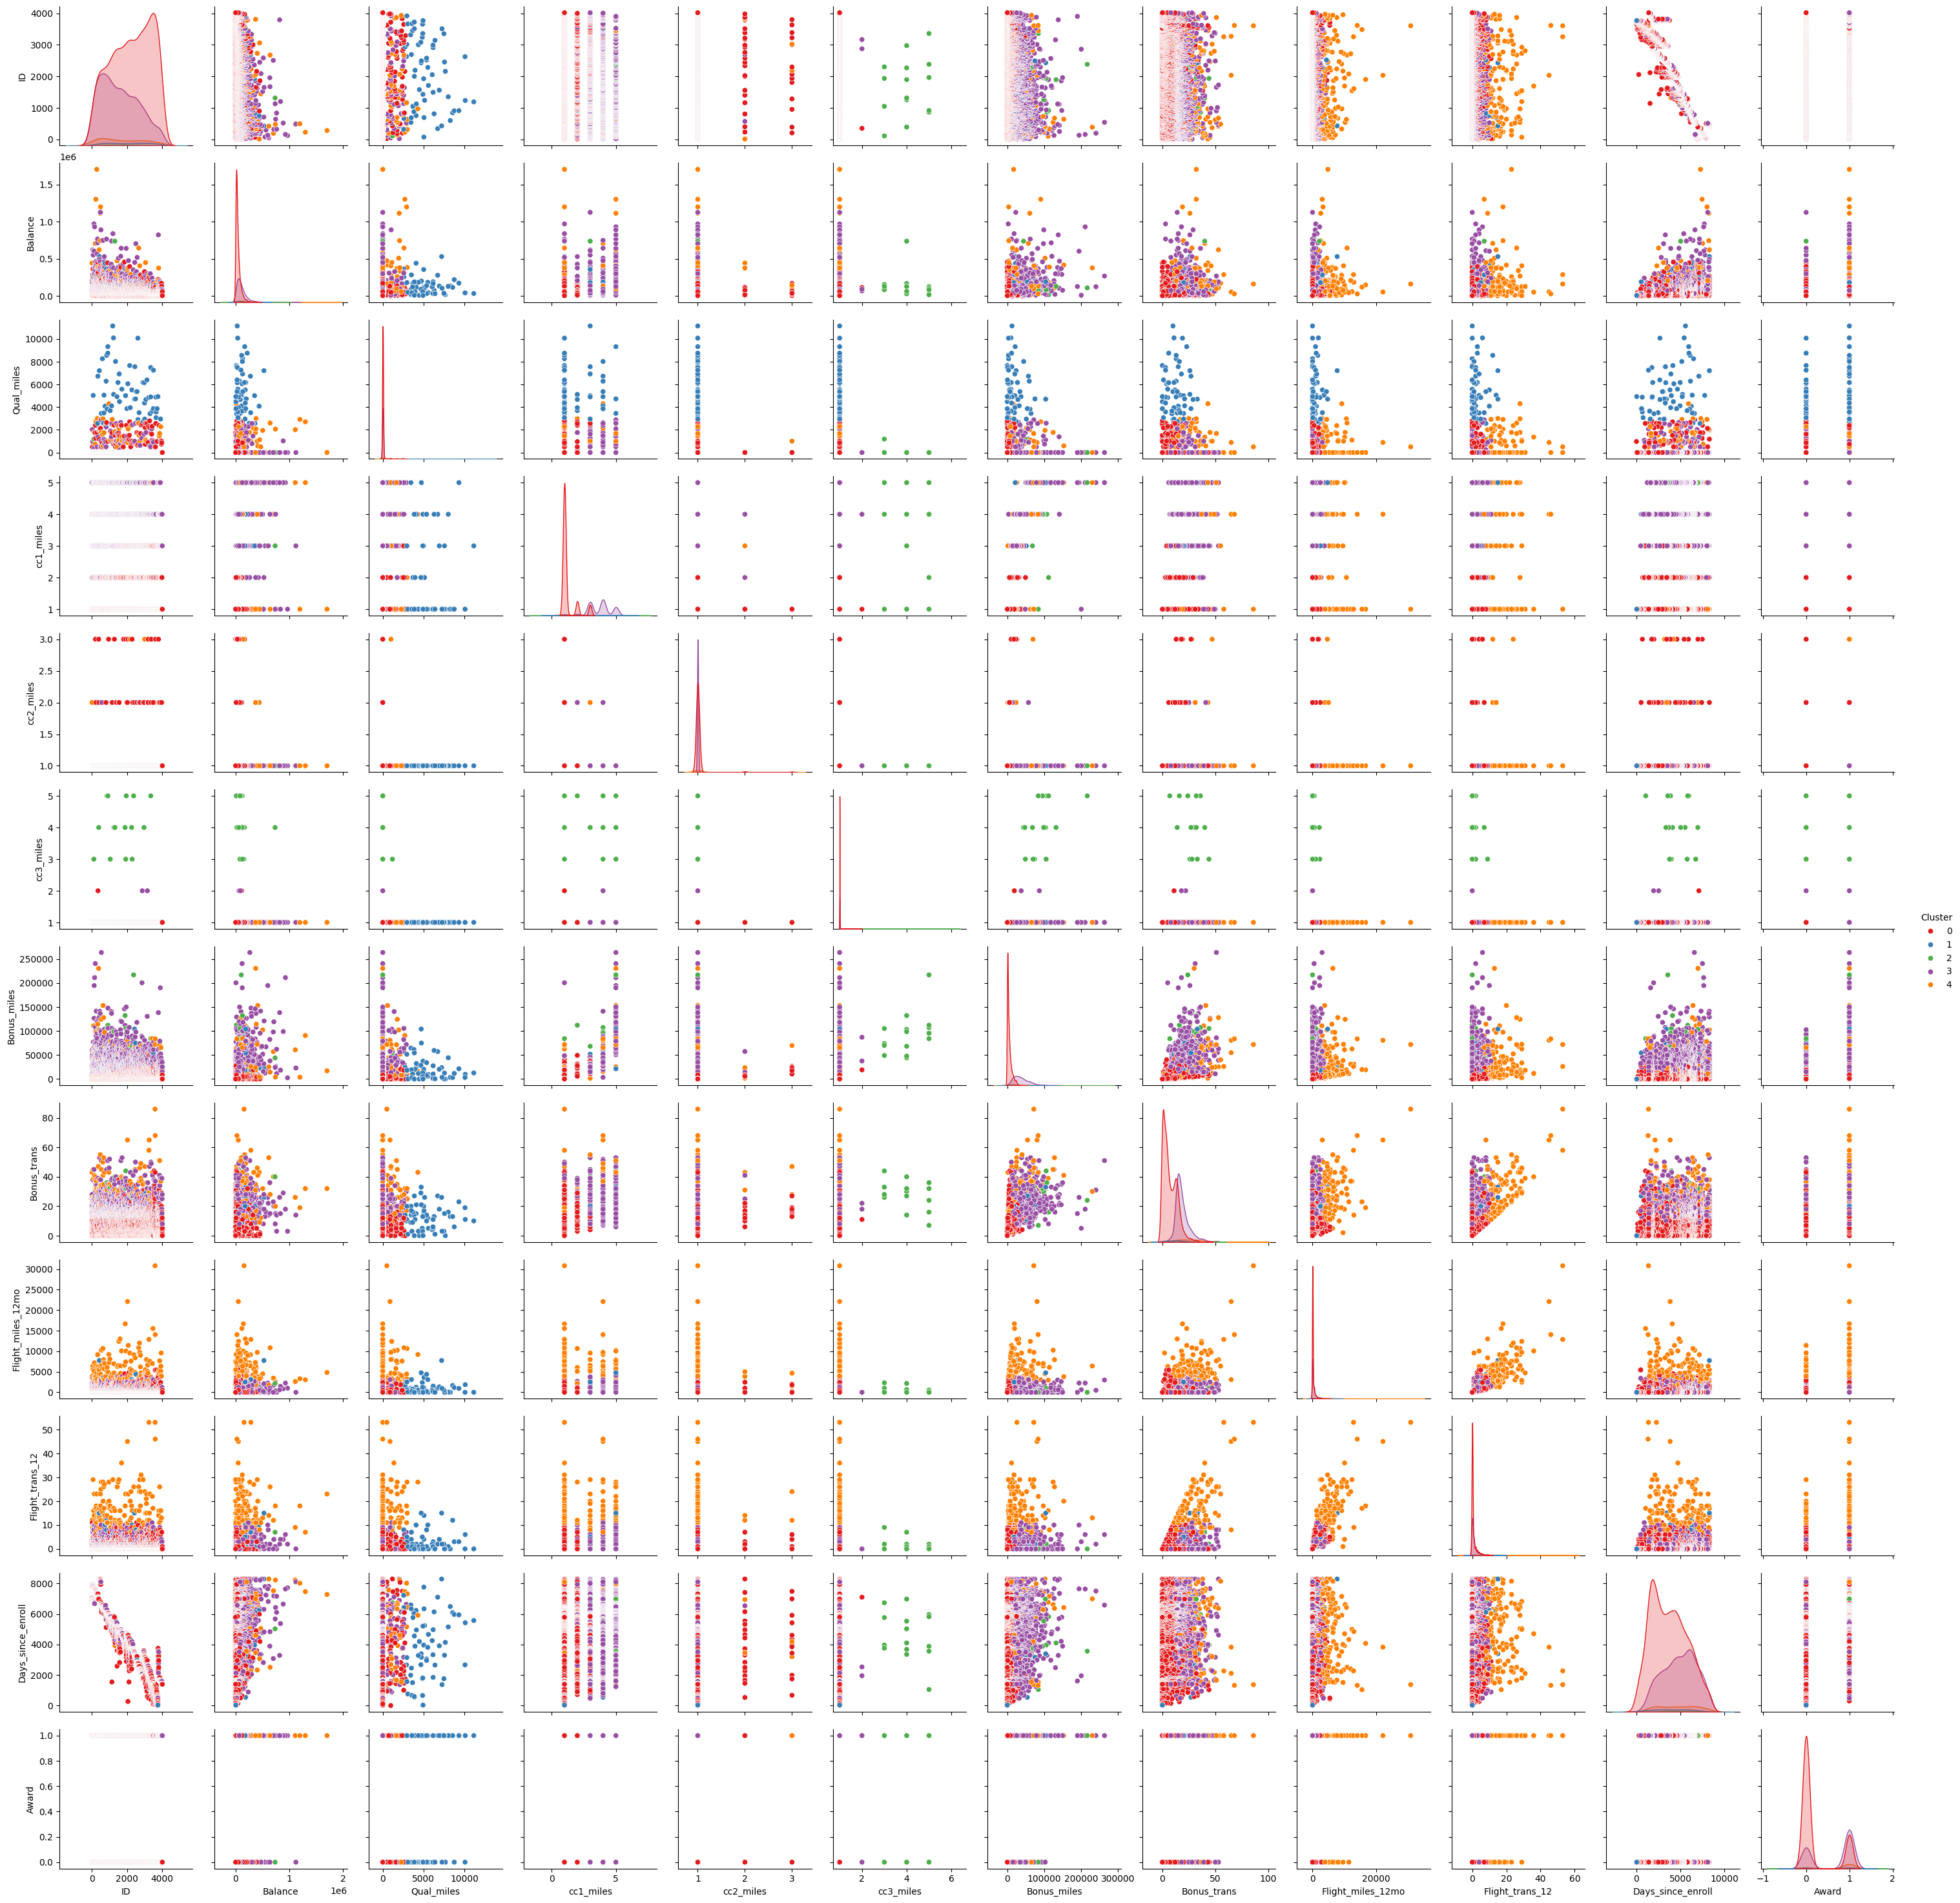

In [ ]:
# Visual inspection using a pairplot to see the distribution across clusters
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='Set1')

In [ ]:
# Identify outliers using z-scores
z_scores = np.abs(df_standardized.apply(lambda x: (x - x.mean()) / x.std()))

In [ ]:
outliers = (z_scores > 3).any(axis=1)

In [ ]:
df_cleaned_no_outliers = df[~outliers]